# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/output_data_cities.csv"
city_data_df = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
city_data_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [55]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"
city_name = cities

#create unique url
query_url = f'{url}&units={units}&appid={weather_api_key}&q='

#create empty lists
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
cities_with_data = []
#cities = ['Paris', 'Detroit', 'Beijing']

for city in cities:
    #call data
    response = requests.get(query_url + city).json()
    
    try:
        #append data to empty lists
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cities_with_data.append(response['name'])
    #pass cities with incomplete dictionaries
    except KeyError:
        pass


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
#create dataframe from appended lists
weather_data_df = pd.DataFrame({'City':cities_with_data,
                                'Latitude':lat,
                                'Longitude':lng,
                                'Temperature':temp,
                                'Humidity (%)':humidity,
                                'Cloudiness (%)':cloudiness,
                                'Wind Speed (mph)':wind_speed})
weather_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Chernyshevskiy,63.0128,112.4714,18.52,90,22,1.28
1,Popondetta,-8.7537,148.2534,73.11,97,100,0.67
2,Impfondo,1.6381,18.0667,72.82,94,100,2.82
3,Rikitea,-23.1203,-134.9692,76.21,67,30,10.60
4,Port Elizabeth,-33.9180,25.5701,60.80,94,20,21.85


In [83]:
weather_data_df.describe()

,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed (mph)
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,18.865110,16.851026,61.624864,70.901361,53.812925,7.177823
std,33.011985,90.030232,19.290555,21.869377,38.145410,4.639740
min,-54.800000,-175.200000,6.190000,7.000000,0.000000,0.360000
25%,-7.922925,-59.759675,48.605000,61.750000,18.750000,3.755000
50%,20.591800,19.130550,66.000000,76.000000,65.000000,6.200000
75%,47.294600,96.138050,77.010000,87.000000,90.000000,9.220000
max,78.218600,179.316700,106.250000,100.000000,100.000000,31.070000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

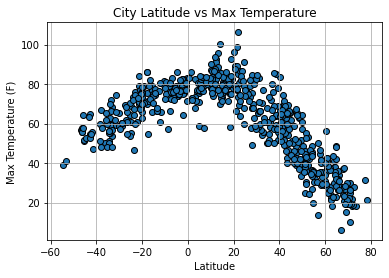

In [84]:
#create scatterplot
plt.scatter(weather_data_df['Latitude'], weather_data_df['Temperature'], marker='o',edgecolors='black')

#make labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

plt.show()


## Latitude vs. Humidity Plot

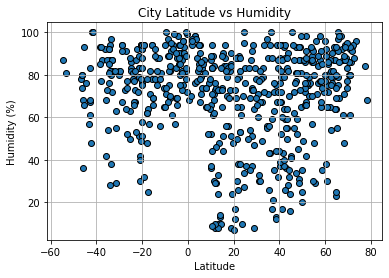

In [85]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Humidity (%)'], marker='o',edgecolors='black')

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("HumidityInWorldCities.png")

plt.show()

## Latitude vs. Cloudiness Plot

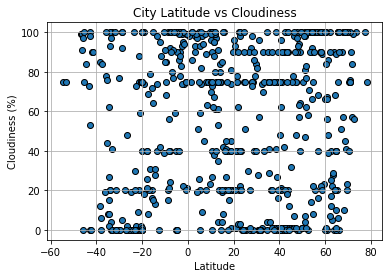

In [86]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Cloudiness (%)'], marker='o',edgecolors='black')

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("CloudInWorldCities.png")

plt.show()

## Latitude vs. Wind Speed Plot

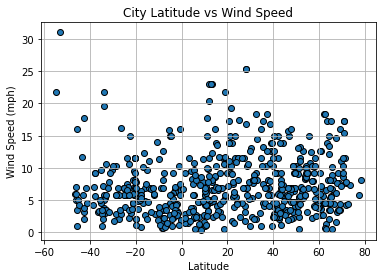

In [87]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Wind Speed (mph)'], marker='o',edgecolors='black')

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

plt.show()

## Linear Regression

In [92]:
north_hemi = weather_data_df.loc[weather_data_df['Latitude']>=0]
south_hemi = weather_data_df.loc[weather_data_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7917522786615461


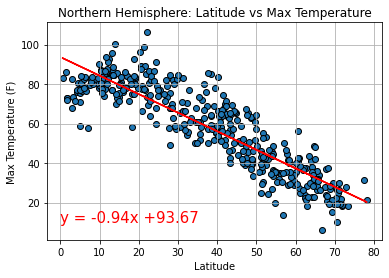

In [101]:
#create scatterplot
x_axis = north_hemi['Latitude']
y_axis = north_hemi['Temperature']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Northern Hemisphere: Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6125415402538701


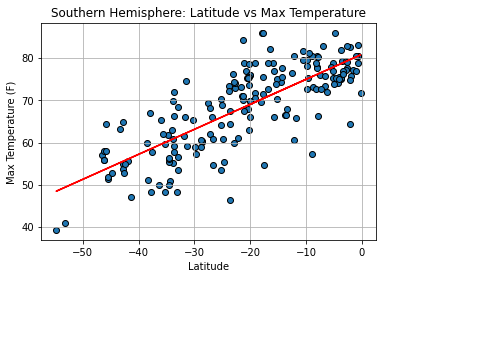

In [102]:
#create scatterplot
x_axis = south_hemi['Latitude']
y_axis = south_hemi['Temperature']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Southern Hemisphere: Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03107855045630004


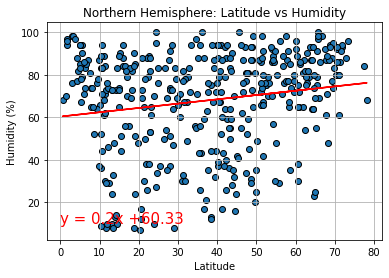

In [103]:
#create scatterplot
x_axis = north_hemi['Latitude']
y_axis = north_hemi['Humidity (%)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Northern Hemisphere: Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.030780342197763346


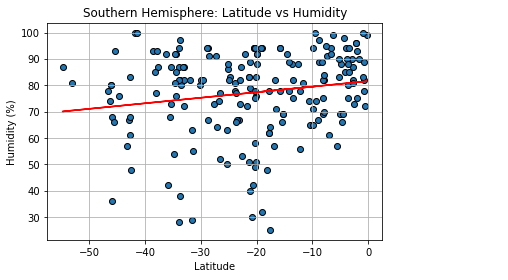

In [104]:
#create scatterplot
x_axis = south_hemi['Latitude']
y_axis = south_hemi['Humidity (%)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Southern Hemisphere: Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0004973529743316581


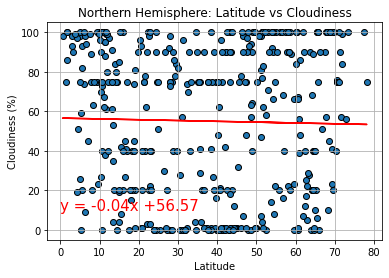

In [105]:
#create scatterplot
x_axis = north_hemi['Latitude']
y_axis = north_hemi['Cloudiness (%)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Northern Hemisphere: Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.021070559511701364


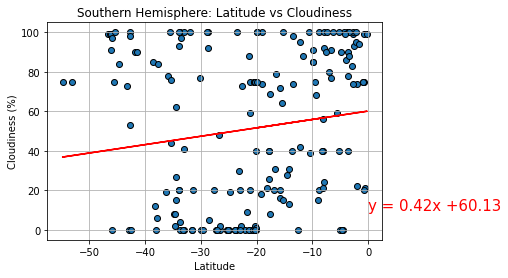

In [106]:
#create scatterplot
x_axis = south_hemi['Latitude']
y_axis = south_hemi['Cloudiness (%)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Southern Hemisphere: Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#create scatterplot
x_axis = north_hemi['Latitude']
y_axis = north_hemi['Wind Speed (mph)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Northern Hemisphere: Latitude vs Wind Speed")
plt.ylabel("Wind Speed ()")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("TempInWorldCities.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.04019723576144484


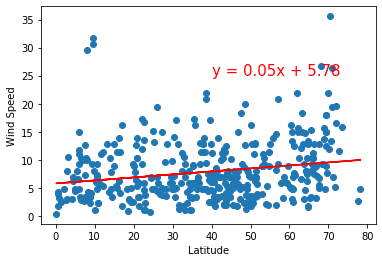

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


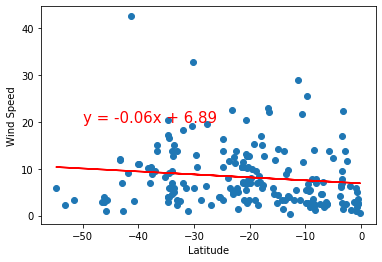